In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Sample Data
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 3)  # Three independent variables
y = 0.5 * X[:, 0] - 1.2 * X[:, 1] + 2.0 * X[:, 2] + np.random.randn(n_samples)  # Dependent variable

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

# Extract coefficients and their significance
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.69e-43
Time:                        03:29:54   Log-Likelihood:                -134.26
No. Observations:                 100   AIC:                             276.5
Df Residuals:                      96   BIC:                             286.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1820      0.097     -1.886      0.0

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Example Data
np.random.seed(42)
n_samples = 100

# Factorial data (ordinal) - assume values 1, 2, 3 (encoded as ordinal values)
factorial1 = np.random.randint(1, 4, size=n_samples)
factorial2 = np.random.randint(1, 4, size=n_samples)

# Categorical data - assume two categories A, B
categorical1 = np.random.choice(['A', 'B'], size=n_samples)
categorical2 = np.random.choice(['X', 'Y'], size=n_samples)

# Continuous data
continuous1 = np.random.randn(n_samples)
continuous2 = np.random.randn(n_samples)

# Dependent variable (target)
y = 0.5 * factorial1 - 1.2 * continuous1 + 0.8 * continuous2 + np.random.randn(n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'factorial1': factorial1,
    'factorial2': factorial2,
    'categorical1': categorical1,
    'categorical2': categorical2,
    'continuous1': continuous1,
    'continuous2': continuous2,
    'target': y
})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['categorical1', 'categorical2'], drop_first=True)

# Check for non-numeric columns
print(df_encoded.dtypes)

# Make sure everything is numeric
X = df_encoded.drop('target', axis=1).astype(float)

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(df_encoded['target'], X).fit()

# Print the summary to get coefficients and significance
print(model.summary())


factorial1          int64
factorial2          int64
continuous1       float64
continuous2       float64
target            float64
categorical1_B       bool
categorical2_Y       bool
dtype: object
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     26.61
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           3.09e-18
Time:                        03:29:54   Log-Likelihood:                -147.38
No. Observations:                 100   AIC:                             308.8
Df Residuals:                      93   BIC:                             327.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
              

Example Code: Conditional Factor Handling

In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

# Example Data
np.random.seed(42)
n_samples = 100

# Categorical data (two categories A, B)
categorical1 = np.random.choice(['A', 'B'], size=n_samples)

# Continuous data
continuous1 = np.random.randn(n_samples)

# Another continuous variable
continuous2 = np.random.randn(n_samples)

# Dependent variable (target) with interaction between categorical1 and continuous1
y = 2.0 * (categorical1 == 'A') * continuous1 + 1.5 * continuous2 + np.random.randn(n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'categorical1': categorical1,
    'continuous1': continuous1,
    'continuous2': continuous2,
    'target': y
})

# Using patsy to create interaction terms in formula
# 'C()' indicates that 'categorical1' is categorical, and 'continuous1' is continuous
# The ':' operator is used to define the interaction term between categorical1 and continuous1

formula = 'target ~ C(categorical1) * continuous1 + continuous2'
y, X = dmatrices(formula, data=df, return_type='dataframe')

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     72.08
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           6.14e-28
Time:                        03:29:54   Log-Likelihood:                -133.45
No. Observations:                 100   AIC:                             276.9
Df Residuals:                      95   BIC:                             289.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Deep learing LSTM

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example multivariate time-series data (3 features)
n_samples = 1000
timesteps = 10  # Number of timesteps to look back
features = 3    # Number of features

# Create random time-series data for illustration
data = np.random.randn(n_samples, features)

# Target variable (for prediction)
target = np.random.randn(n_samples)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data, columns=['feature1', 'feature2', 'feature3'])
df['target'] = target

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Convert to supervised learning problem by creating sequences
def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(target[i+time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = timesteps
X, y = create_sequences(scaled_data[:, :-1], scaled_data[:, -1], time_steps)

# Reshape the data for LSTM (samples, timesteps, features)
n_features = X.shape[2]
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [47]:
# Define the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(50, activation='relu', input_shape=(time_steps, n_features)))

# Add fully connected layer
model.add(Dense(1))  # Predicting a single target

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1882 - val_loss: 0.0385
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 - val_loss: 0.0282
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0283 - val_loss: 0.0285
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0269 - val_loss: 0.0296
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0258 - val_loss: 0.0285


In [48]:
# Predict using the test data
y_pred = model.predict(X_test)

# Inverse transform to get the original scale (if necessary)
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred), axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Evaluate the model performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Mean Squared Error: {mse}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Mean Squared Error: 1.1119083061180042


Train/Test Loss CurvesPurpose: To check for overfitting or underfitting by comparing the loss on training data vs. validation/test data.
Plot: Plot the training and validation loss over epochs to see if the model converges, and whether there is a gap between training and validation loss (indicating overfitting).

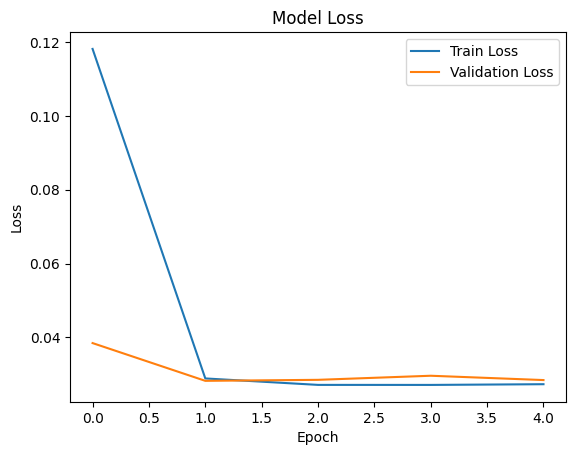

In [49]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


 Prediction vs. True Values Plot

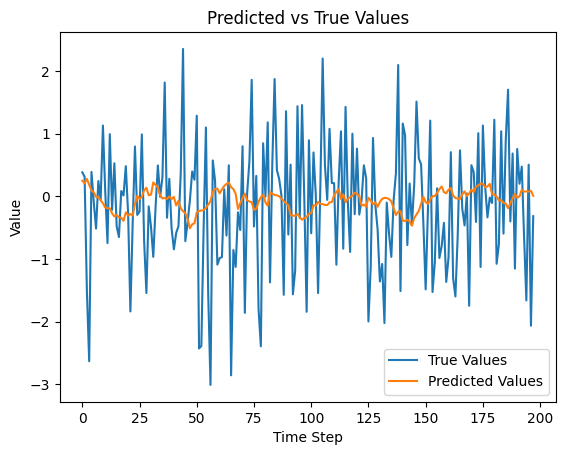

In [50]:
# Plot true vs predicted values
plt.plot(y_test_rescaled, label='True Values')
plt.plot(y_pred_rescaled, label='Predicted Values')
plt.title('Predicted vs True Values')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()


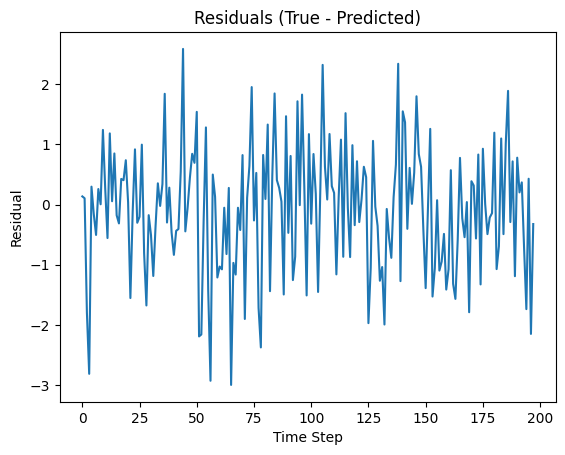

In [51]:
residuals = y_test_rescaled - y_pred_rescaled

plt.plot(residuals)
plt.title('Residuals (True - Predicted)')
plt.ylabel('Residual')
plt.xlabel('Time Step')
plt.show()


Autocorrelation Plot of Residuals

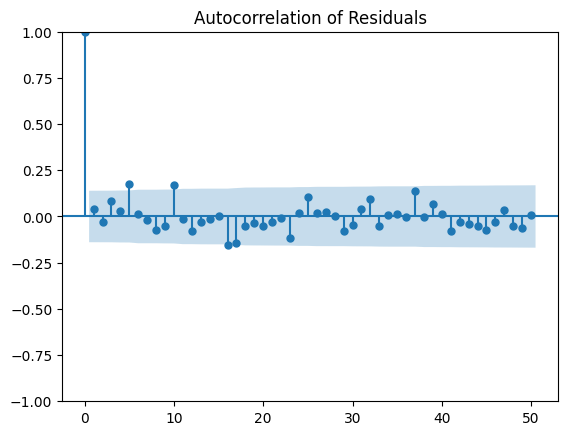

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=50)
plt.title('Autocorrelation of Residuals')
plt.show()


In [53]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 1.1119083061180042
Root Mean Squared Error: 1.0544706283808971


In [54]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f'R-squared: {r2}')


R-squared: -0.08837729729189592


In [55]:
pip install shap

In [56]:
X_test

array([[[0.58481591, 0.68353826, 0.34194851],
        [0.50364829, 0.87065728, 0.35456159],
        [0.31244377, 0.78794564, 0.7140298 ],
        ...,
        [0.53902693, 0.80063648, 0.55258062],
        [0.55075474, 0.60967576, 0.43455158],
        [0.57392233, 0.08576773, 0.38501894]],

       [[0.50364829, 0.87065728, 0.35456159],
        [0.31244377, 0.78794564, 0.7140298 ],
        [0.48426806, 0.70563551, 0.62357617],
        ...,
        [0.55075474, 0.60967576, 0.43455158],
        [0.57392233, 0.08576773, 0.38501894],
        [0.52269253, 0.32708675, 0.48447546]],

       [[0.31244377, 0.78794564, 0.7140298 ],
        [0.48426806, 0.70563551, 0.62357617],
        [0.36360983, 0.44362118, 0.60746907],
        ...,
        [0.57392233, 0.08576773, 0.38501894],
        [0.52269253, 0.32708675, 0.48447546],
        [0.45060721, 0.83587738, 0.65729634]],

       ...,

       [[0.33200672, 0.56649649, 0.27883212],
        [0.66167468, 0.71437206, 0.50569154],
        [0.54215152, 0

In [57]:
# import shap

# # Assuming 'model' is your trained LSTM model and 'X_test' is your test data
# explainer = shap.Explainer(model.predict, X_test)  # Wrap the model prediction function

# # Compute SHAP values
# shap_values = explainer(X_test)

# # Plot the summary for feature importance
# shap.summary_plot(shap_values, X_test)


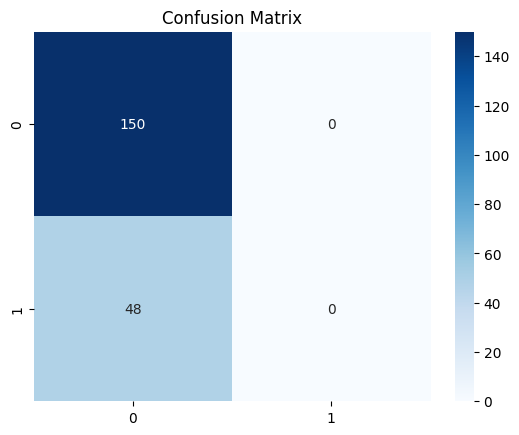

In [58]:
# Learning Rate vs. Loss Plot
# Assuming a binary classification problem, you can threshold the predictions
threshold = 0.5
y_pred_class = (y_pred_rescaled > threshold).astype(int)
y_test_class = (y_test_rescaled > threshold).astype(int)

# Then, you can compute the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

